In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [8]:
df = pd.read_csv('../output/predicted.csv')
df.head()

,Unnamed: 0,id,text,category
0,0,1180633752885743616,People at the cinema thinking they got the #Jo...,PLOT
1,1,1180633751744913408,I have a new favorite joker @jokermovie #Joker...,NaN
2,2,1180633723932483584,"⭐⭐⭐⭐⭐ Performance, what a movie #JokerMovie pi...",NaN
3,3,1180633642198077441,#JokerMovie was absolutely amazing and ended w...,HYPE
4,4,1180633577693880321,I just want to give both Arthur Fleck and Gary...,CHARACTERS


In [4]:
sia = SentimentIntensityAnalyzer()

sentence = df['text'][0]
sia.polarity_scores(sentence)

{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.3612}

In [5]:
for index, row in df.iterrows():
    sentence = row['text']
    df.loc[index, 'sentiment'] = sia.polarity_scores(sentence)
    
    
    
    
    
for index, row in df.iterrows():
        doc = nlp(row['text'])
        for ent in doc.ents:
            df.loc[index, 'category'] = [(ent.label_)]

ValueError: Must have equal len keys and value when setting with an iterable

In [9]:
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x))

In [10]:
df.head()

,Unnamed: 0,id,text,category,sentiment
0,0,1180633752885743616,People at the cinema thinking they got the #Jo...,PLOT,"{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp..."
1,1,1180633751744913408,I have a new favorite joker @jokermovie #Joker...,NaN,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp..."
2,2,1180633723932483584,"⭐⭐⭐⭐⭐ Performance, what a movie #JokerMovie pi...",NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,3,1180633642198077441,#JokerMovie was absolutely amazing and ended w...,HYPE,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp..."
4,4,1180633577693880321,I just want to give both Arthur Fleck and Gary...,CHARACTERS,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp..."


In [38]:
df['negative'] = df['sentiment'].apply(lambda x: x['neg'])
df['neutral'] = df['sentiment'].apply(lambda x: x['neu'])
df['positive'] = df['sentiment'].apply(lambda x: x['pos'])

In [39]:
df.head()

,Unnamed: 0,id,text,category,sentiment,negative,neutral,positive
0,0,1180633752885743616,People at the cinema thinking they got the #Jo...,PLOT,"{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...",0.0,0.815,0.185
1,1,1180633751744913408,I have a new favorite joker @jokermovie #Joker...,NaN,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp...",0.0,0.526,0.474
2,2,1180633723932483584,"⭐⭐⭐⭐⭐ Performance, what a movie #JokerMovie pi...",NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000
3,3,1180633642198077441,#JokerMovie was absolutely amazing and ended w...,HYPE,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...",0.0,0.674,0.326
4,4,1180633577693880321,I just want to give both Arthur Fleck and Gary...,CHARACTERS,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.0,0.714,0.286


In [40]:
df['negative'].mean()

0.0592680601040262

In [41]:
df['neutral'].mean()

0.7931659121556539

In [42]:
df['positive'].mean()

0.14756814679252553

In [44]:
sentiment = pd.DataFrame([df['negative'].mean(), df['neutral'].mean(), df['positive'].mean()])

<ipython-input-56-88f15aa30b0b>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sentiment, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)


([<matplotlib.patches.Wedge at 0x122ddeb80>,
 [Text(-0.21288996171989744, 1.1301229420726318, 'Negative'),
  Text(-0.3149370624485987, -1.1060355539928397, 'Neutral'),
  Text(0.5142448616769113, 1.0286166546575524, 'Positive')],
 [Text(-0.16660953525905015, 0.8844440416220595, '5.9%'),
  Text(-0.246472483655425, -0.8655930422552657, '79.3%'),
  Text(0.4024525004428002, 0.8050043384276496, '14.8%')])

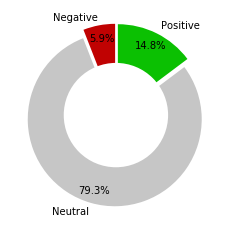

In [56]:
colors = ['#C00202','#C6C6C6','#0BC002']
labels = ['Negative', 'Neutral', 'Positive']
explode = (0.05,0.05,0.05)
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.pie(sentiment, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

In [58]:
def graphsentiment(df):
    #Get a sentiment graph 
    sia = SentimentIntensityAnalyzer()
    df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x))
    df['negative'] = df['sentiment'].apply(lambda x: x['neg'])
    df['neutral'] = df['sentiment'].apply(lambda x: x['neu'])
    df['positive'] = df['sentiment'].apply(lambda x: x['pos'])
    
    sentiment = pd.DataFrame([df['negative'].mean(), df['neutral'].mean(), df['positive'].mean()])
    colors = ['#C00202','#C6C6C6','#0BC002']
    labels = ['Negative', 'Neutral', 'Positive']
    explode = (0.05,0.05,0.05)
    centre_circle = plt.Circle((0,0),0.60,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.pie(sentiment, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
    
    plt.title('Sentiment Analysis')
    plt.tight_layout()
    plt.savefig('../output/sentiment') 
    
    print('Your sentiment graph is ready in the output folder')

Your sentiment graph is ready in the output folder


<ipython-input-58-fa3a1231667c>:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sentiment, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)


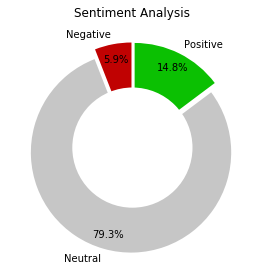

In [59]:
graphsentiment(df)